# Relaxation methods for linear systems

In [1]:
import numpy as np
from scipy.linalg import solve_triangular
import matplotlib.pyplot as plt

In [2]:
def jacobi(A, b, x_0, iters):
    """Perform iters iterations of the Jacobi method to solve
    Ax = b, given an initial guess x_0, and return the iterates as a
    list of vectors.
    """
    x = x_0
    iterates = [np.copy(x)]
    
    # Diagonal of A as a column vector
    d = np.diag(A).reshape((len(A), 1))
    
    for k in range(1, iters+1):
        r = b - A @ x
        
        # x^{(k+1)} = x^{(k)} + D^{-1} r^{(k)}
        x += r / d
        
        iterates.append(np.copy(x))
    
    return iterates

In [3]:
def gauss_seidel(A, b, x_0, iters):
    """Perform iters iterations of the Gauss-Seidel method to solve 
    Ax = b, given an initial guess x_0, and return the iterates as a 
    list of vectors.
    """
    x = x_0
    iterates = [np.copy(x)]
    
    for k in range(1, iters+1):
        r = b - A @ x
        
        # x^{(k+1)} = x^{(k)} + (L + D)^{-1} r^{(k)}
        x += solve_triangular(A, r, lower=True)
        
        iterates.append(np.copy(x))
    
    return iterates

**Example**

$$A = \begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix},\quad b = A \begin{bmatrix} 1 \\ 1 \end{bmatrix}.$$

In [4]:
A = np.array([[2, -1], 
              [-1, 2]])

n = len(A)

x_exact = np.array([[1], 
                    [1]])
b = A @ x_exact

## Jacobi method

In [5]:
M = np.diag(np.diag(A))
T = np.identity(n) - np.linalg.solve(M, A)

spectral_radius = np.max(np.abs(np.linalg.eigvals(T)))

print("Spectral radius of Jacobi iteration matrix: {:.4f}".format(
      spectral_radius))

Spectral radius of Jacobi iteration matrix: 0.5000


In [6]:
x_0 = np.zeros((n, 1))
iters = 10

iterates = jacobi(A, b, x_0, iters)

errors = np.zeros((iters+1, 1))
errors[0] = np.linalg.norm(x_exact - iterates[0])

for k in range(1, iters+1):
    errors[k] = np.linalg.norm(x_exact - iterates[k])
    
    print("k = {:2d}    Error: {:.2e}    Rate: {:.4f}".format(
          k,
          errors.item(k),
          errors.item(k) / errors.item(k-1)))

k =  1    Error: 7.07e-01    Rate: 0.5000
k =  2    Error: 3.54e-01    Rate: 0.5000
k =  3    Error: 1.77e-01    Rate: 0.5000
k =  4    Error: 8.84e-02    Rate: 0.5000
k =  5    Error: 4.42e-02    Rate: 0.5000
k =  6    Error: 2.21e-02    Rate: 0.5000
k =  7    Error: 1.10e-02    Rate: 0.5000
k =  8    Error: 5.52e-03    Rate: 0.5000
k =  9    Error: 2.76e-03    Rate: 0.5000
k = 10    Error: 1.38e-03    Rate: 0.5000


## Gauss–Seidel method

In [7]:
M = np.tril(A)
T = np.identity(n) - np.linalg.solve(M, A)

spectral_radius = np.max(np.abs(np.linalg.eigvals(T)))

print("Spectral radius of Gauss–Seidel iteration matrix: {:.4f}".format(
      spectral_radius))

Spectral radius of Gauss–Seidel iteration matrix: 0.2500


In [8]:
x_0 = np.zeros((n, 1))
iters = 10

iterates = gauss_seidel(A, b, x_0, iters)

errors = np.zeros((iters+1, 1))
errors[0] = np.linalg.norm(x_exact - iterates[0])

for k in range(1, iters+1):
    errors[k] = np.linalg.norm(x_exact - iterates[k])
    
    print("k = {:2d}    Error: {:.2e}    Rate: {:.4f}".format(
          k,
          errors.item(k),
          errors.item(k) / errors.item(k-1)))

k =  1    Error: 5.59e-01    Rate: 0.3953
k =  2    Error: 1.40e-01    Rate: 0.2500
k =  3    Error: 3.49e-02    Rate: 0.2500
k =  4    Error: 8.73e-03    Rate: 0.2500
k =  5    Error: 2.18e-03    Rate: 0.2500
k =  6    Error: 5.46e-04    Rate: 0.2500
k =  7    Error: 1.36e-04    Rate: 0.2500
k =  8    Error: 3.41e-05    Rate: 0.2500
k =  9    Error: 8.53e-06    Rate: 0.2500
k = 10    Error: 2.13e-06    Rate: 0.2500


## ω-Gauss–Seidel (SOR) method

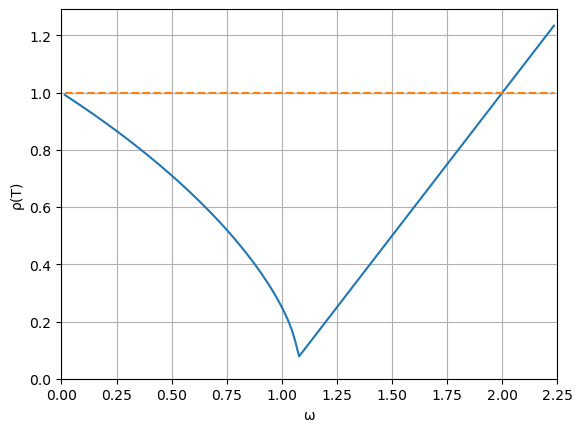

In [9]:
omegas = np.arange(2**(-6), 2.25, 2**(-6))
rhos = np.empty(len(omegas))

for (i, omega) in enumerate(omegas):
    M = (1 - omega) / omega * np.diag(np.diag(A)) + np.tril(A)
    T = np.identity(n) - np.linalg.solve(M, A)
    rhos[i] = np.max(np.abs(np.linalg.eigvals(T)))

fig, ax = plt.subplots()

ax.plot(omegas, rhos)
ax.plot(omegas, np.ones(len(omegas)), '--')

ax.set_xlim([0, 2.25])
ax.set_ylim([0, plt.ylim()[1]])
ax.grid(True)
ax.set_xlabel("ω")
ax.set_ylabel("ρ(T)");

*Exercise:* what is the (exact) value of $\omega$ that minimizes $\rho(T)$ for this $A$?

In [10]:
plt.show()  # Show figures when running as a Python script